Steg 1:
Det vi har börjat med är att vi har importerat CSV-filen i VS Code och sedan läst in filen med pandas.read_csv och eftersom filen är semikolon sepererad så har vi använt sep=";" Vi kan se att det finns 10 000 rader i varje kolumn, 10 kolumner och inga nollvärden etc. (Vi får finslipa texterna, detta är bara liten start)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("car_price_dataset.csv", sep=";")


# 2. Datafördelning

Vi följer praxis och har en fördelning på 60-20-20

In [28]:
# Delar upp i X och y
X = df.drop("Price", axis=1)
y = df["Price"]

# Delar upp i (hel)tränings- och 20% testset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Delar upp träningsset i 20 % tränings- och 20% valideringsset
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)


# Skapa en EDA-dataframe 
EDA_train_df = X_train_full.copy()
EDA_train_df["Price"] = y_train_full

print(EDA_train_df.head()) #visar de första raderna i datan
print(EDA_train_df.shape)  #kollar storlek på rader och kolumner
print(EDA_train_df.info()) # kontrollerar kolumner och datatyper

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
9254  Volkswagen      Golf  2007          3.2    Hybrid  Semi-Automatic   
1561         BMW  5 Series  2010          4.8  Electric  Semi-Automatic   
1670     Hyundai    Sonata  2006          1.9    Hybrid  Semi-Automatic   
6087       Honda      CR-V  2019          1.7    Diesel  Semi-Automatic   
6669    Mercedes   E-Class  2005          3.6    Petrol       Automatic   

      Mileage  Doors  Owner_Count  Price  
9254    33948      5            4   9721  
1561   224853      2            1   9402  
1670    13435      3            5   8531  
6087   199846      2            3   7503  
6669      261      3            2  10694  
(8000, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         8000 non-null   object 
 1   Model         8000 non-null   object 
 2 

# 3. EDA

3.1 Deskriptiv statistik

In [8]:
print(EDA_train_df.describe()) # Medelvärde, median, min/max, standardavvikelse
print()
print(EDA_train_df['Brand'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(EDA_train_df['Model'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(EDA_train_df['Fuel_Type'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print(EDA_train_df['Transmission'].value_counts()) # Antal unika värden i kategoriska kolumner. Kan också visualiseras med tex ett stapeldiagram. 
print()
print("Amount of brands:", EDA_train_df['Brand'].nunique()) # Antal unika bilar i datasetet
print("Amount of models:", EDA_train_df['Model'].nunique()) # Antal unika modeller i datasetet

              Year  Engine_Size        Mileage        Doors  Owner_Count  \
count  8000.000000  8000.000000    8000.000000  8000.000000  8000.000000   
mean   2011.520375     2.996887  149477.003250     3.503625     2.991875   
std       6.897792     1.153237   86613.284937     1.111482     1.420849   
min    2000.000000     1.000000      25.000000     2.000000     1.000000   
25%    2006.000000     2.000000   74192.250000     3.000000     2.000000   
50%    2012.000000     3.000000  150069.500000     4.000000     3.000000   
75%    2017.000000     4.000000  224292.750000     4.000000     4.000000   
max    2023.000000     5.000000  299947.000000     5.000000     5.000000   

              Price  
count   6000.000000  
mean    8867.290333  
std     3127.909721  
min     2000.000000  
25%     6659.750000  
50%     8899.000000  
75%    11090.000000  
max    18301.000000  

Brand
Audi          851
Volkswagen    828
Ford          826
Hyundai       818
Honda         807
Chevrolet     799
BM

4. Visualisering


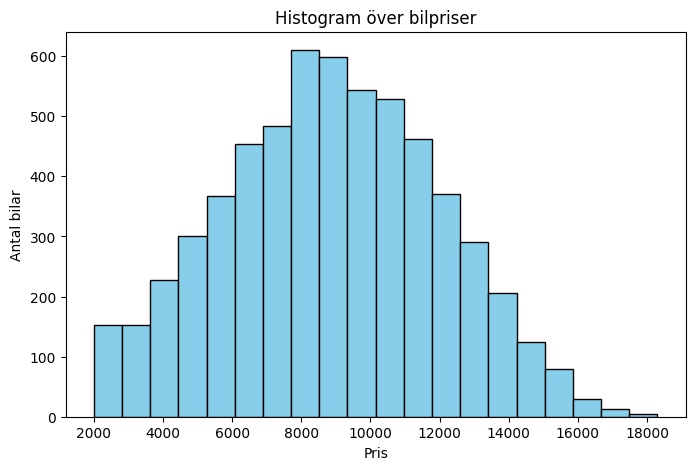

In [23]:
# Histogram över bilpriser

plt.figure(figsize=(8,5))
plt.hist(EDA_train_df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram över bilpriser")
plt.xlabel("Pris")
plt.ylabel("Antal bilar")
plt.show()

# Visar på form på fördelning: Symmetrisk (normalfördelad), skev åt höger, skev åt vänster

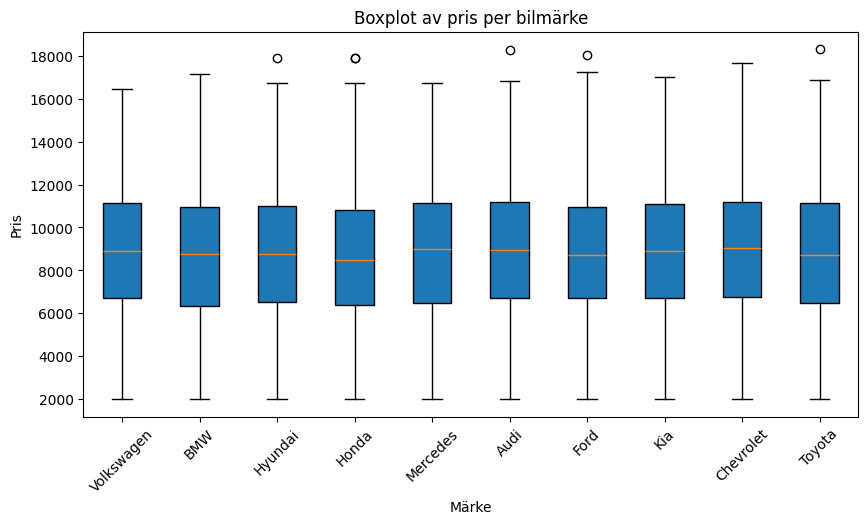

In [29]:
plt.figure(figsize=(10,5))
brands = EDA_train_df['Brand'].unique()
data_to_plot = [EDA_train_df[EDA_train_df['Brand']==brand]['Price'] for brand in brands]

plt.boxplot(data_to_plot, tick_labels=brands, patch_artist=True)
plt.title("Boxplot av pris per bilmärke")
plt.xlabel("Märke")
plt.ylabel("Pris")
plt.xticks(rotation=45)
plt.show()
# Identifiera outliers som är relativa till gruppen, inte hela datan.


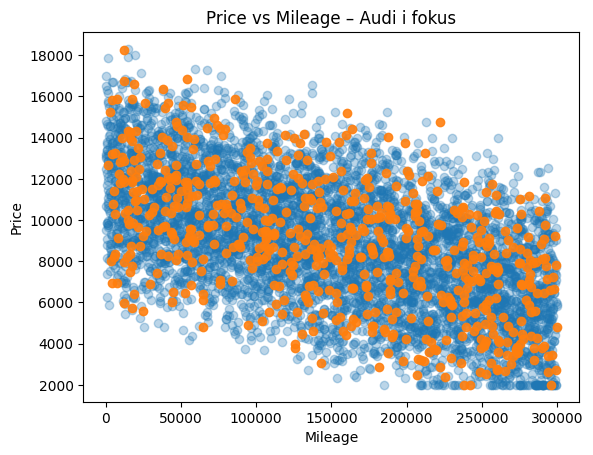

In [25]:
audi = EDA_train_df[EDA_train_df["Brand"] == "Audi"]
others = EDA_train_df[EDA_train_df["Brand"] != "Audi"]

plt.figure()
plt.scatter(others["Mileage"], others["Price"], alpha=0.3)
plt.scatter(audi["Mileage"], audi["Price"], alpha=0.9)

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price vs Mileage – Audi i fokus")

plt.show()